### Project Contribution Table

| Name                      | Student ID | Contributions   |
|---------------------------|------------|------------------|
| Benjamin Teoh Tian Hao    | 1007197    | Q3               |
| Dominic Lim Wei Ping      | 1006863    | Q0, 1, 5         |
| Khoo Teng Jin             | 1007104    | Q4               |
| Lee Sean Lee Sheng        | 1006903    | Q2, 5            |
| Wong Jun Ming, Ivan       | 1006927    | Q2, 6            |

### Problem Statement
<!--Background description of the problem-->
Food security is defined as people having reliable access to eve (The World Bank, 2023). During the global COVID pandemic, food security 

The World Bank. (2023, August 28). What is food security? there are four dimensions. World Bank. https://www.worldbank.org/en/topic/agriculture/brief/food-security-update/what-is-food-security 


<!--Persona-->
UN rep

With that in mind, our final problem statement is: How might we predict the food security index of a country during a global pandemic based on their socio-economic indicators such as Human Development Index(HDI) ?

### Data
<!--Data sources --> 
<!--Explain how we collated the data and combined it into a single dataset for use-->



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
uncleaned_df = pd.read_csv("dataset.csv")
# display(uncleaned_df)

In [26]:
#Dataset cleaning

#Rename columns to acronyms
uncleaned_df = uncleaned_df.rename(columns={
    'Global Food Security Index (GFSI)': 'GFSI',
    'Human Development Index (HDI)': 'HDI',
    'Corruption Index (CI)': 'CI',
    'GDP per capita (GDP)': 'GDP',
    'Cost of Living Index (COL)': 'COL',
    'Healthcare Index (HI)': 'HI'
})

#Delete rows containing NaN values
df = uncleaned_df.replace("-", np.NaN).dropna()
df = df.drop(['Country'], axis=1)

df = df.astype(float) #convert all values in df to float
# df

#Data transformation
# df["GDP"] = df["GDP"].apply(lambda x: )


Text(0.5, 1.0, 'HDI vs GFSI')

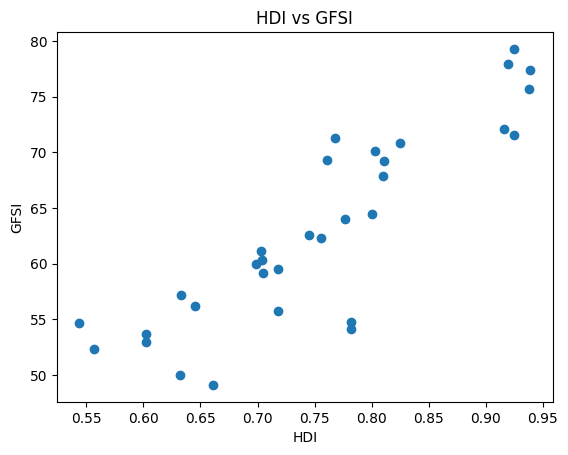

In [39]:
# Scatter chart showing relationship between HDI and GFSI

plt.scatter(df["HDI"] ,df["GFSI"])
plt.xlabel("HDI")
plt.ylabel("GFSI")
plt.title("HDI vs GFSI")

Text(0.5, 1.0, 'CI vs GFSI')

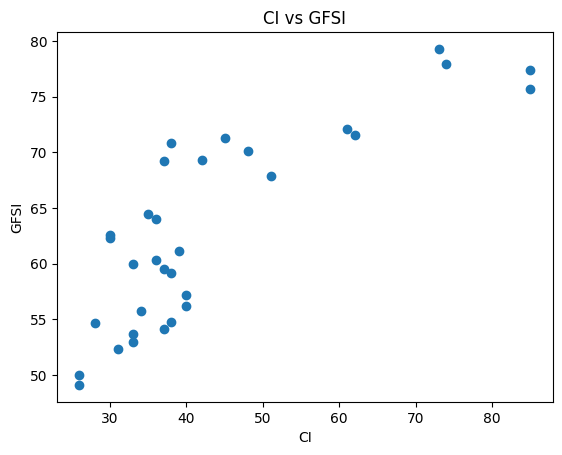

In [40]:
#  Scatter chart showing relationship between CI and GFSI
plt.scatter(df["CI"] ,df["GFSI"])
plt.xlabel("CI")
plt.ylabel("GFSI")
plt.title("CI vs GFSI")

Text(0.5, 1.0, 'GDP vs GFSI')

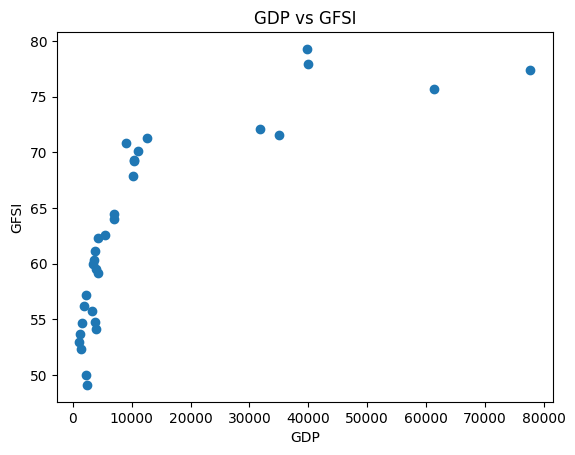

In [38]:
# Scatter chart showing relationship between GDP and GFSI

plt.scatter(df["GDP"] ,df["GFSI"])
plt.xlabel("GDP")
plt.ylabel("GFSI")
plt.title("GDP vs GFSI")

Text(0.5, 1.0, 'COL vs GFSI')

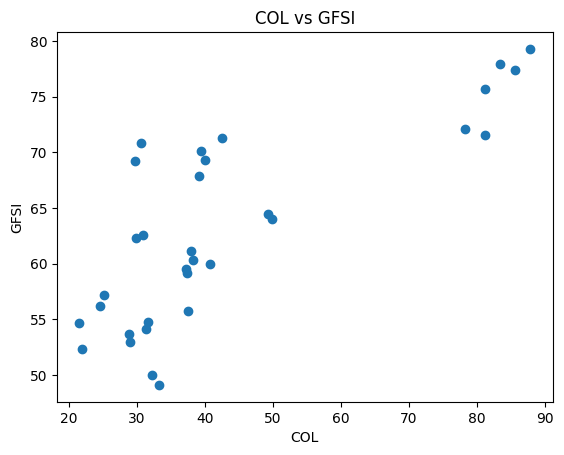

In [41]:
# Scatter chart showing relationship between COL and GFSI

plt.scatter(df["COL"] ,df["GFSI"])
plt.xlabel("COL")
plt.ylabel("GFSI")
plt.title("COL vs GFSI")

Text(0.5, 1.0, 'HI vs GFSI')

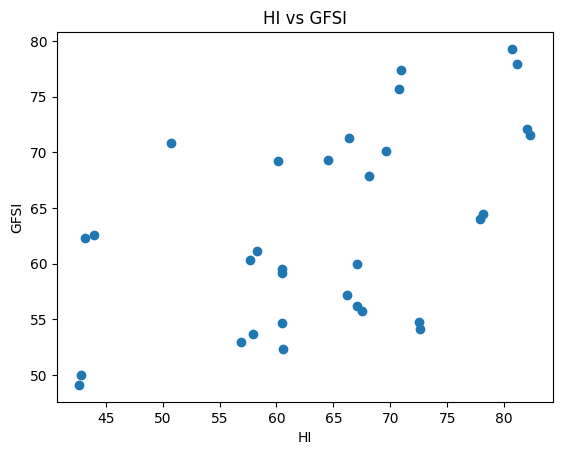

In [42]:
# Scatter chart showing relationship between HI and GFSI

plt.scatter(df["HI"] ,df["GFSI"])
plt.xlabel("HI")
plt.ylabel("GFSI")
plt.title("HI vs GFSI")

In [9]:
# Functions for preparing test and train datasets
 
def get_features_targets(df, feature_names, target_names):
    df_feature = pd.DataFrame(df[feature_names])
    df_target = pd.DataFrame(df[target_names])
    return df_feature, df_target

def normalize_z(dfin, column_means=None, column_stds=None):
    if column_means is None:
        column_means = dfin.mean(axis=0) # creates 1 mean per column
    if column_stds is None:
        column_stds = dfin.std(axis=0) # creates 1 std dev per column
    dfout = (dfin - column_means)/column_stds
        
    return dfout, column_means, column_stds

def normalize_minmax(dfin, columns_mins = None, columns_maxs = None):
    dfin_copy = dfin.copy()

    if columns_mins == None:
        columns_mins = dfin_copy.min(axis=0)
        
    if isinstance(columns_mins, list):
        columns_mins = np.array(columns_mins)
    
    if columns_maxs == None:
        columns_maxs = dfin_copy.max(axis=0)

    if isinstance(columns_maxs, list):
        columns_maxs = np.array(columns_maxs)
    

    dfout = (dfin_copy - columns_mins) / (columns_maxs - columns_mins)

    return dfout, columns_mins, columns_maxs

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    
    indexes = df_feature.index
    n = int(len(indexes) * test_size)
    
    if random_state is not None:
        np.random.seed(random_state)
    
    test_indexes = np.random.choice(indexes, n, replace=False)
    train_indexes = list(set(indexes) - set(test_indexes))
    
    df_feature_train = df_feature.loc[train_indexes,:]
    df_target_train = df_target.loc[train_indexes,:]
    
    df_feature_test = df_feature.loc[test_indexes,:]
    df_target_test = df_target.loc[test_indexes,:]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test

In [10]:
#Cost and gradient descent functions for regression

def calc_linreg(X, beta):
    return X @ beta # matrix multiplication

def compute_cost_linreg(X, y, beta):
    m = X.shape[0] # m is number of values
    y_pred = calc_linreg(X,beta)
    error = y_pred - y
    cost = 1/(2*m) * (error.T @ error) # results in a 2D 1x1 matrix
    J = cost[0,0] # extract scalar value from 2D 1x1 matrix
    
    return J

def prepare_feature(df_feature):
    m = df_feature.shape[0]

    # convert df to numpy array if not df
    if isinstance(df_feature, pd.DataFrame):
        np_feature = df_feature.to_numpy() 
    else:
        np_feature = df_feature
    
    # Joins 2D ones array of size (m,1) to the left of np_feature  
    X = np.concatenate((np.ones((m,1)), np_feature), axis = 1)
    return X

def prepare_target(df_target):
    # convert df to numpy array if not df
    if isinstance(df_target, pd.DataFrame):
        return df_target.to_numpy()
    else:
        return df_target

def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = []

    for i in range(num_iters):
        y_pred = calc_linreg(X,beta)
        error = y_pred - y

        dev = X.T @ error #partial derivative of J
        beta = beta - (alpha/m) * dev # calculate new beta
        J_storage.append(compute_cost_linreg(X,y,beta)) #stores cost value at each iteration
        
    return beta, np.array(J_storage)

def predict_linreg(df_feature, beta, means=None, stds=None):
    feature,means,stds = normalize_z(df_feature,means,stds)
    X = prepare_feature(feature)
    y_pred = calc_linreg(X, beta)
    return y_pred

In [16]:
# Metrics to test accuracy of model

def r2_score(y, ypred):
    error = y - ypred
    ssres = np.sum(error**2)

    y_mean = np.mean(y)
    diff = y - y_mean
    sstot = np.sum(diff**2)

    return 1 - (ssres/sstot)

def adjusted_r2_score(y, ypred, p):
    n = y.shape[0]
    error = y - ypred
    ssres = np.sum(error**2)

    y_mean = np.mean(y)
    diff = y - y_mean
    sstot = np.sum(diff**2)

    r2 = 1 - (ssres / sstot)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    return adjusted_r2


def mean_squared_error(target, pred):
    n = target.shape[0]
    error = target - pred
    return 1/n * np.sum(error**2)

def root_mean_squared_error(target, pred):
    n = target.shape[0]
    error = target - pred
    return pow((1/n * np.sum(error**2)), 0.5)

In [21]:
#Linear regression: Predict GFSI using HDI, CI, GDP, COL, HI

# Get features and targets from data frame
columns = ["HDI", "CI", "GDP", "COL", "HI"]
df_feature, df_target = get_features_targets(df, columns, ["GFSI"])

# Split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state = 100, test_size = 0.3)

# Normalize the feature using z normalization
df_feature_train_z,_ ,_ = normalize_z(df_feature_train)

X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
p = 5 #number of predictors
beta = np.zeros((p+1,1)) #NOTE: np.zeros((k,1)), k = p + 1 

# call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
pred = predict_linreg(df_feature_test, beta)


In [22]:
#Testing of model
target = prepare_target(df_target_test) #recalibrate target value to test target values

print(r2_score(target, pred))
print(adjusted_r2_score(target, pred, p))
print(mean_squared_error(target, pred))
print(root_mean_squared_error(target, pred))
display(beta)


0.6739953365874148
0.1306542308997729
33.950689112636965
5.826721986901123


array([[ 6.33608516e+01],
       [ 6.47148321e+00],
       [ 1.53153458e+00],
       [ 1.97364204e-01],
       [-3.24760210e-01],
       [-4.22354158e-02]])

In [25]:
#Linear regression: Predict GFSI using HDI, CI, GDP, COL, HI

# Get features and targets from data frame
columns = ["HDI", "CI", "GDP", "COL", "HI"]
df_feature, df_target = get_features_targets(df, columns, ["GFSI"])

# Split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state = 100, test_size = 0.3)

# Normalize the feature using z normalization
df_feature_train_z,_ ,_ = normalize_z(df_feature_train)

X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
p = 5 #number of predictors
beta = np.zeros((p+1,1)) #NOTE: np.zeros((k,1)), k = p + 1 

# call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
pred = predict_linreg(df_feature_test, beta)

#Testing of model
target = prepare_target(df_target_test) #recalibrate target value to test target values

print(r2_score(target, pred))
print(adjusted_r2_score(target, pred, p))
print(mean_squared_error(target, pred))
print(root_mean_squared_error(target, pred))
display(beta)


0.6739953365874148
0.1306542308997729
33.950689112636965
5.826721986901123


array([[ 6.33608516e+01],
       [ 6.47148321e+00],
       [ 1.53153458e+00],
       [ 1.97364204e-01],
       [-3.24760210e-01],
       [-4.22354158e-02]])